In [1]:
import os
import zipfile
import glob

from sklearn.model_selection import train_test_split
import shutil
import glob
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchmetrics import Recall, Precision
from PIL import Image
import warnings

warnings.filterwarnings('ignore')


In [2]:
# Step 1: Extract ZIP
zip_file_path = r'C:\data2\Food classification\archive.zip'
extract_dir = r'C:\data2\Food classification\extracted'

In [3]:
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Extraction completed!")

✅ Extraction completed!


In [4]:
# Step 2: Train/Test directories
train_dir = r'C:\data2\Food classification\food_dataset\train'
test_dir = r'C:\data2\Food classification\food_dataset\test'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [5]:
# Step 3: Auto-detect dataset folder inside extract_dir
extracted_items = os.listdir(extract_dir)
dataset_folder = None
for item in extracted_items:
    full_path = os.path.join(extract_dir, item)
    if os.path.isdir(full_path):
        dataset_folder = full_path
        break

if dataset_folder is None:
    raise FileNotFoundError("❌ No dataset folder found inside extracted directory!")

print("📂 Dataset folder detected:", dataset_folder)

class_path = dataset_folder

📂 Dataset folder detected: C:\data2\Food classification\extracted\Indian Food Dataset


In [6]:
class_path = "extracted/Indian Food Dataset"
class_dirs = [d for d in os.listdir(class_path) if os.path.isdir(os.path.join(class_path, d))]


In [7]:
import os
import glob
from sklearn.model_selection import train_test_split
import shutil

# Loop through each class directory
for class_dir in class_dirs:
    full_class_path = os.path.join(class_path, class_dir)
    
    # Get all images (png, jpg, jpeg)
    image_files = (
        glob.glob(os.path.join(full_class_path, '*.png')) +
        glob.glob(os.path.join(full_class_path, '*.jpg')) +
        glob.glob(os.path.join(full_class_path, '*.jpeg'))
    )
    
    # Split into train and test sets
    train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)
    
    # Create destination folders
    train_class_dir = os.path.join(train_dir, class_dir)
    test_class_dir = os.path.join(test_dir, class_dir)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)
    
    # Move files
    for file in train_files:
        shutil.copy(file, train_class_dir)
    for file in test_files:
        shutil.copy(file, test_class_dir)

In [8]:
for class_dir in class_dirs:
    print(f"Class: {class_dir}")
    print(f"Training images: {len(os.listdir(os.path.join(train_dir, class_dir)))}")
    print(f"Testing images: {len(os.listdir(os.path.join(test_dir, class_dir)))}\n")


Class: Aloo Paratha
Training images: 95
Testing images: 24

Class: Dhokla
Training images: 84
Testing images: 22

Class: Dosa
Training images: 80
Testing images: 20

Class: Idli
Training images: 83
Testing images: 21

Class: Malai Kofta
Training images: 94
Testing images: 24

Class: Puran Poli
Training images: 111
Testing images: 28

Class: Samosa
Training images: 92
Testing images: 23



In [9]:
# Define transformations
train_transforms = transforms.Compose([
# Parse to tensor
transforms.ToTensor(),
# Resize to 128X128
transforms.Resize((128, 128))
])
# Create dataset passing
dataset_train = ImageFolder(
# Path to data
train_dir,
# Predefined transformations
transform = train_transforms
)

In [10]:
dataloader_train = DataLoader(
dataset_train,
shuffle=True,
batch_size=1
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0002738233..1.0000002].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0023486556..1.0000002].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0067211236..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].
Clippin

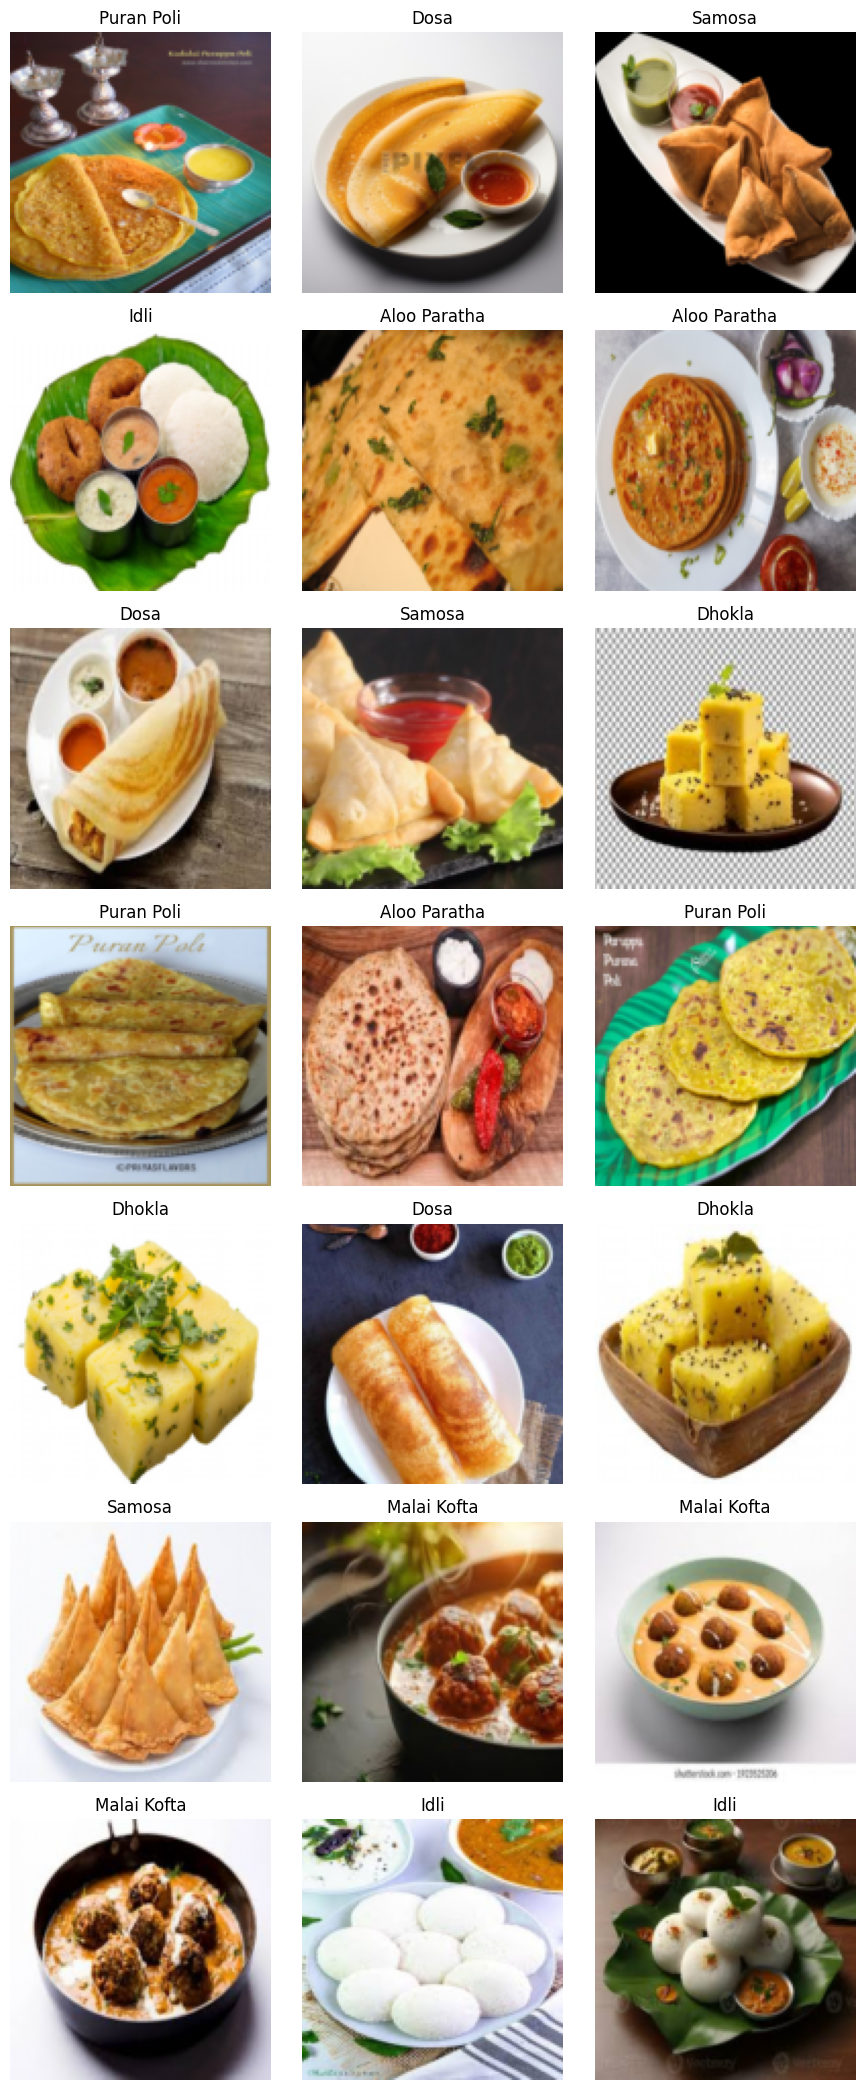

In [11]:
# Get the class names from the dataset
class_names = dataset_train.classes

# Number of images per class to display
images_per_class = 3

# Total number of rows needed (1 row per class)
num_rows = len(class_names)
num_cols = images_per_class

# Create a figure with the required number of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 3, num_rows * 3))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Initialize a dictionary to track displayed images
images_displayed = {class_name: 0 for class_name in class_names}

# Loop over the dataset to populate the grid
idx = 0
for image, label in dataloader_train:
    label = label.item()  # Convert to integer
    class_name = class_names[label]

    if images_displayed[class_name] < images_per_class:
        ax = axes[idx]
        image = image.squeeze().permute(1, 2, 0).numpy()
        ax.imshow(image)
        ax.set_title(f'{class_name}')
        ax.axis('off')

        images_displayed[class_name] += 1
        idx += 1

    # Break if we've filled all subplots
    if idx >= num_rows * num_cols:
        break

# Adjust layout
plt.tight_layout()
plt.show()


In [12]:
train_transforms = transforms.Compose([
transforms.Resize((128, 128)),
transforms.RandomHorizontalFlip(),
transforms.RandomRotation(40),
transforms.ToTensor(),
])
dataset_train = ImageFolder(
train_dir,
transform=train_transforms
)
dataloader_train = DataLoader(
dataset_train,
batch_size=32,
shuffle=True
)

In [13]:
test_transforms = transforms.Compose([
transforms.Resize((128, 128)),
transforms.ToTensor(),
])
dataset_test = ImageFolder(
test_dir,
transform=test_transforms
)
dataloader_test = DataLoader(
dataset_test,
batch_size=32,
shuffle=False
)

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

num_classes = 7

model = models.efficientnet_b0(pretrained=True)

model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR

criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

optimizer = optim.AdamW(model.parameters(), lr=5e-5, weight_decay=1e-4)

scheduler = CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-6)


In [16]:
# Lists to track loss and accuracy
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

In [17]:
num_epochs = 15
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in dataloader_train:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(dataloader_train)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Print average loss for the epoch
    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}')

    # Evaluate accuracy on the test set
    model.eval()
    running_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for images, labels in dataloader_test:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_loss = running_loss / len(dataloader_test)
    test_accuracy = 100 * correct_test / total_test
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f'Epoch {epoch+1}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')


Epoch 1, Loss: 1.9279
Epoch 1, Test Loss: 1.8316, Test Accuracy: 33.33%
Epoch 2, Loss: 1.7573
Epoch 2, Test Loss: 1.7091, Test Accuracy: 53.09%
Epoch 3, Loss: 1.6109
Epoch 3, Test Loss: 1.5410, Test Accuracy: 62.96%
Epoch 4, Loss: 1.4360
Epoch 4, Test Loss: 1.3796, Test Accuracy: 72.84%
Epoch 5, Loss: 1.2809
Epoch 5, Test Loss: 1.2164, Test Accuracy: 77.78%
Epoch 6, Loss: 1.1062
Epoch 6, Test Loss: 1.0595, Test Accuracy: 80.25%
Epoch 7, Loss: 0.9933
Epoch 7, Test Loss: 0.9470, Test Accuracy: 84.57%
Epoch 8, Loss: 0.9177
Epoch 8, Test Loss: 0.8744, Test Accuracy: 85.19%
Epoch 9, Loss: 0.8134
Epoch 9, Test Loss: 0.8251, Test Accuracy: 87.04%
Epoch 10, Loss: 0.7472
Epoch 10, Test Loss: 0.7857, Test Accuracy: 87.65%
Epoch 11, Loss: 0.7068
Epoch 11, Test Loss: 0.7425, Test Accuracy: 90.74%
Epoch 12, Loss: 0.6568
Epoch 12, Test Loss: 0.7204, Test Accuracy: 90.12%
Epoch 13, Loss: 0.6496
Epoch 13, Test Loss: 0.6955, Test Accuracy: 91.98%
Epoch 14, Loss: 0.6428
Epoch 14, Test Loss: 0.6741, Test

In [18]:
# Define metrics
metric_precision = Precision(
    task="multiclass",
    num_classes=num_classes,
    average="micro"
).to(device)

metric_recall = Recall(
    task="multiclass",
    num_classes=num_classes,
    average="micro"
).to(device)

model.eval()
with torch.no_grad():
    for images, labels in dataloader_test:  # ✅ Indented under 'with'
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        metric_precision(preds, labels)
        metric_recall(preds, labels)

# Compute final metrics
precision = metric_precision.compute()
recall = metric_recall.compute()
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Precision: 0.9320987462997437
Recall: 0.9320987462997437


In [19]:
# Define metrics
metric_precision_seperate = Precision(
    task="multiclass",
    num_classes=num_classes,
    average=None
).to(device)

metric_recall_seperate = Recall(
    task="multiclass",
    num_classes=num_classes,
    average=None
).to(device)

model.eval()
with torch.no_grad():
    for images, labels in dataloader_test:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        # Update metrics
        metric_precision_seperate(preds, labels)
        metric_recall_seperate(preds, labels)

# Compute final metrics
precision = metric_precision_seperate.compute()
recall = metric_recall_seperate.compute()

# Get precision per class
precision_per_class = {
    k: precision[v].item()
    for k, v in dataset_test.class_to_idx.items()
}
print("Precision Per class")
print(precision_per_class)

# Get recall per class
recall_per_class = {
    k: recall[v].item()
    for k, v in dataset_test.class_to_idx.items()
}
print("Recall Per class")
print(recall_per_class)


Precision Per class
{'Aloo Paratha': 0.8695651888847351, 'Dhokla': 0.95652174949646, 'Dosa': 1.0, 'Idli': 1.0, 'Malai Kofta': 0.9583333134651184, 'Puran Poli': 0.8275862336158752, 'Samosa': 0.9583333134651184}
Recall Per class
{'Aloo Paratha': 0.8333333134651184, 'Dhokla': 1.0, 'Dosa': 0.8999999761581421, 'Idli': 1.0, 'Malai Kofta': 0.9583333134651184, 'Puran Poli': 0.8571428656578064, 'Samosa': 1.0}


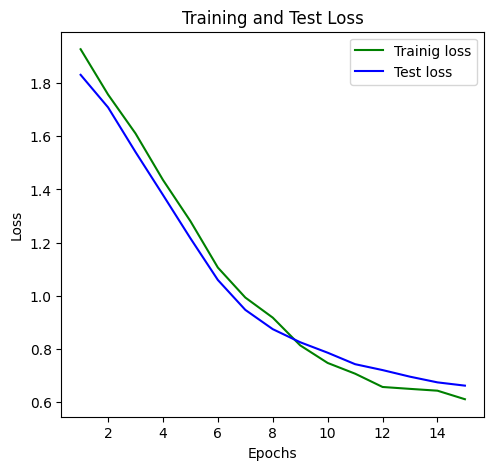

In [20]:
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'g', label='Trainig loss')
plt.plot(epochs, test_losses, 'b', label='Test loss')
plt.title("Training and Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

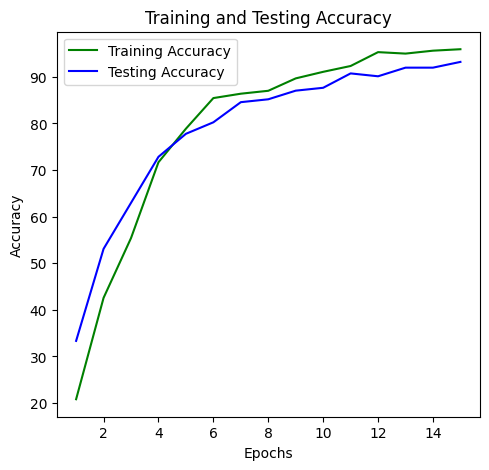

In [21]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'g', label='Training Accuracy')
plt.plot(epochs, test_accuracies, 'b', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
import os
from PIL import Image
import torch
import torchvision.transforms as transforms

# Define the class labels
class_names = [i[0] for i in dataset_test.class_to_idx.items()]

# Corrected path to your image (inside Dhokla folder)
image_path = r"C:\data2\Food classification\extracted\Indian Food Dataset\Dhokla\Dhokala (1).jpg"

# Check if file exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image not found: {image_path}")

# Load the custom image
image = Image.open(image_path).convert("RGB")  # Convert to RGB for safety

# Apply transformations
custom_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Preprocess the image
image = custom_transforms(image).unsqueeze(0).to(device)  # Add batch dimension

# Ensure the model is in evaluation mode
model.eval()

with torch.no_grad():
    output = model(image)
    probs = torch.softmax(output, dim=1)
    _, predicted_idx = torch.max(probs, 1)
    predicted_class = class_names[predicted_idx.item()]

print("Predicted Class:", predicted_class)


Predicted Class: Dhokla
